# R1

Github repo: [`github.com/christoffer-s/notebooks`](https://github.com/christoffer-s/notebooks) 

Branch: main

<br>
<br/>



> Det eneste jeg savner er resten 
>
> \- Carmen

---

## Innholdsfortegnelse
[Grenseverdier](#grenseverdier)

[Gjennomsnitt](#gjennomsnitt)

[Andregradsfunksjon](#andregradsfunksjon)

[Polynomfunksjon](#derivasjon-av-polynomfunksjon)

[2.305 Sinus R1](#oppgave-2305-sinus-r1)

## Grenseverdier

---

In [ ]:
def f(x):
    return (x + 1) ** 2


a = float(input("Skriv a verdien: "))
nøyaktighet = 0.00000001
pres = 6

print(f"Øvre grenseverdi: f({round(a - nøyaktighet, pres)}) = {round(f(a - nøyaktighet), pres)}")
print(f"Nedre grenseverdi: f({round(a + nøyaktighet, pres)}) = {round(f(a + nøyaktighet), pres)}")

In [ ]:
from numpy import log10

def f(x):
    return (2 * x**2 - 7*x +5) / (x - 1)

a = float(input("Skriv a verdien: "))

nøyaktighet = 0.0000000001
pres = int(abs(log10(nøyaktighet)) - 1)

x_øvre, x_nedre = a + nøyaktighet, a - nøyaktighet
y_øvre, y_nedre = round(f(x_øvre), pres), round(f(x_nedre), pres)

if y_øvre == y_nedre:
    print(f"Grenseverdien for f({round(x_øvre, pres)}) = {y_øvre}")

else:
    print(f"Øvre grenseverdi: f({round(x_øvre, pres)}) = {y_øvre}")
    print(f"Nedre grenseverdi: f({round(x_nedre, pres)}) = {y_nedre}")

## Gjennomsnitt

---

In [ ]:
def avg(x, pres):
    return round(sum(x) / len(x), pres)


liste = [3, 4, 5, 6, 7, 2, 2, 2]

avg(liste, 3)

In [ ]:
pres = 3
nums = []

while True:
    try:
        val = input(f"Tall som er i listen: {*nums,}\nSkriv inn tall: ")
        val = float(val)
        nums.append(val)

    except ValueError:
        if val == " ":
            avg = round(sum(nums) / len(nums), pres)
            break

        else:
            print("Skriv et tall eller mellomrom for å avslutte")
            continue

    except Exception as e:
        print("Error", e)
        avg = None
        break

print(f"Gjennomsnittet av: {', '.join(str(x) for x in nums)} = {avg} ")

## Andregradsfunksjon

---

In [ ]:
#   #   #   #   #   #   #   #   #   #   #   #   #
#                                               #
#    Legge til grafing av f'(x)                 #
#                                               #
#    Bedre UI for svar og grafing               #
#                                               #
#   #   #   #   #   #   #   #   #   #   #   #   #

from matplotlib import pyplot as plt
from numpy import linspace, sqrt


class andregradsfunksjon():
    ''' A class to analyse second degree polynomial functions. Expected form: f(x) = ax^2+bx+c'''  

    def __init__(self, uttrykk):
        self.uttrykk = uttrykk
        self.navn, self.a, self.b, self.c = self.formatering()


    def formatering(self):
        uttrykk = self.uttrykk
        index = 0
        
        for i, letter in enumerate(uttrykk):
            if letter == "=":
                navn = uttrykk[0:i - 1]
                a_index = i + 2
                
            elif letter == "+" or letter == "-":
                if not index and i != a_index:
                    b_index = i
                    index = 1

                elif index:
                    c_index = i
                    break
        
        a = float(self.uttrykk[a_index:b_index - 3])
        b = float(self.uttrykk[b_index:c_index - 1])
        c = float(self.uttrykk[c_index:])
        
        return navn, a, b, c


    def funksjon_uttrykk(self):
        return self.uttrykk


    def funksjon_punkt(self, x):
        return self.a*x**2 + self.b*x + self.c


    def funksjon_nullpunkter(self):
        a = self.a
        b = self.b
        c = self.c

        if (b**2) - (4*a*c) >= 0:
            rot = sqrt((b**2) - (4*a*c))
            
            x1 = (-b - rot) / (2*a)
            x2 = (-b + rot) / (2*a)

        else:
            x1 = None
            x2 = None

        return x1, x2


    def ekstremalpunkt(self):
        x = (-self.b) / (2 * self.a)
        return x, self.funksjon_punkt(x)


    def derivert(self):
        uttrykk = self.uttrykk
        
        for i, letter in enumerate(uttrykk):
            if letter == "(":
                temp_navn = uttrykk[0:i] + "'" + uttrykk[i:i + 3] 
                return f"{temp_navn} = {2*self.a}x + {self.b}"
                
        else:
            return None


    def derivert_punkt(self, x):
        return (2 * self.a * x) + self.b

    
    def funksjon_graf(self, x_start, x_stopp):
        x = linspace(x_start, x_stopp)
        plt.grid()
        plt.plot(x, self.funksjon_punkt(x), label = self.funksjon_uttrykk())
        plt.legend()     
        plt.show()

        

In [ ]:
f = andregradsfunksjon("f(x) = 1x^2+4x+4")
print(f.funksjon_uttrykk())
print(f.derivert())
print(f.funksjon_punkt(3))
print(f.derivert_punkt(3))
print(f.funksjon_nullpunkter())
print(f.ekstremalpunkt())
f.funksjon_graf(-2, 5)

In [ ]:
num = 25

num1 = num ** 0.5
num2 = num ** (1/3)

if num1.is_integer():
    print("tallet er et kvadrattall")

elif num2.is_integer():
    print("tallet er et kubetall")

else:
    print("tallet er ingen av delene")


## Derivasjon av polynomfunksjon

---

algoritmen $ : n\cdot ax^{n-1}+p\cdot bx^{p-1}+q\cdot cx^{q-1}\cdots$

In [ ]:
# function must be ordered from highest to lowest grade.
import re

class poly():
    def __init__(self, expression):
        self.expression = expression # expected form f(x) = 2x^3-0x^2+3x-2
        self.terms = self.abc()
        self.delta_x = 0.000001
        self.pers = 4
    
    
    def abc(self):
        function = self.expression
        indexed = []

        index = function.index("=") + 2

        string = function[index:]
        stripped = re.split(r'([-+])', string)


        if stripped[0] == "":
            stripped.pop(0)
            start = 0

        else:
            indexed.append(stripped[0])
            start = 1


        loops = len(stripped) // 2
        for i in range(loops):
            merged = stripped[-i * 2 - 2] + stripped[-i * 2 - 1]
            indexed.insert(start, merged)

        return indexed
   
        

    def numerical(self, x):
        terms = self.terms
        counter = 0

        for element in terms:
            try:
                index = element.index("x")
                a = float(element[:index])
                
                try:
                    n = float(element[index + 2:])

                except:
                    n = 1
             
                counter += a * x**n
            
            except:
                counter += float(element)
    
        return counter


    def limit(self, x):
        pass


    def derivation_numerical(self, x):
        return round((self.numerical(x + 0.000001) - self.numerical(x)) / 0.000001, 4) # bruk samme delta x som grenseverdi, ha var i __init__, evt class var


    def derivation_symbolic(self):
        terms = self.terms
        symbolic = []

        if "x" not in terms[-1]:
            terms.pop(-1)

        for element in terms:
            index = element.index("x")
            a = float(element[:index])

            if a != 0: # fjern når abc() er omskrevet
                try:
                    n = float(element[index + 2:])
                    a = a*n
                    symbolic.append(f"{a*n}x^{n-1}")

                except:
                    n = 1
                    symbolic.append(str(a))
        
        return " ".join(symbolic)





f = poly("f(x) = -2x^3-0x^2+3x-2")
g = poly("g(x) = 2x")
print(f.terms)
# print(f.numerical(1))
# print(f.derivation_numerical(1))
print(f.derivation_symbolic())


In [ ]:





terms = ['-2x^3', '-0x^2', '+3x', '-2']
symbolic = []

if "x" not in terms[-1]:
    terms.pop(-1)

for element in terms:
    index = element.index("x")
    a = float(element[:index])

    if a != 0:
        try:
            n = float(element[index + 2:])
            a = a*n
            symbolic.append(f"{a*n}x^{n-1}")

        except:
            n = 1
            symbolic.append(a)
  

    
print(terms)
print(symbolic)

## Oppgave 2.305 Sinus R1
---

In [2]:
def f(x):
    return x**3 + x - 20


def g(x):
    return x - 4


# kan både derivere både f(x) og g(x) numerisk 
def num_deri(x, function):
    a = 0.0000001
    return round((function(x + a) - function(x)) / a, 6)


# for å få "brøkstrek"
def brøk(txt):
    return '\x1B[4m' + str(txt) + '\x1B[0m'


x = 4                   # x verdi til funksjonenene 
length = len(str(x))    # brukes til formatering slik at ting får riktig avstand fra hverandre
fx = "f\'(x)"           # kan ikke bruke backlash i f-string, må derfor ha en egen variabel for uttrykket

# printer vanlig grenseverdi, kun printing ikke regning
print(f"lim{' ':{length}} {brøk('f(x)')}   =  {brøk(f(x))}")
print(f"x->{x} g(x)      {g(x)}\n")

# printer L'Hôpitals regel, renger det numerisk
print(f"lim{' ':{length}} {brøk(fx)}  =  {brøk(num_deri(x, f))}  =  {num_deri(x, f) / num_deri(x, g)}")
print(f"x->{x} g'(x)     {num_deri(x, g)}")

lim  f(x)   =  48
x->4 g(x)      0

lim  f'(x)  =  49.000001  =  49.000001
x->4 g'(x)     1.0


x     = -2
f(x)  = -0.018315638888734186
f'(x) = -0.037
f'(x) = -0.037
diff  = 0.000

x     = -1
f(x)  = -0.1353352832366127
f'(x) = -0.271
f'(x) = -0.271
diff  = 0.000

x     = 0
f(x)  = -1.0
f'(x) = -2.000
f'(x) = -2.000
diff  = 0.000

x     = 1
f(x)  = -7.3890560989306495
f'(x) = -14.778
f'(x) = -14.778
diff  = 0.000

x     = 2
f(x)  = -54.59815003314423
f'(x) = -109.196
f'(x) = -109.196
diff  = 0.000



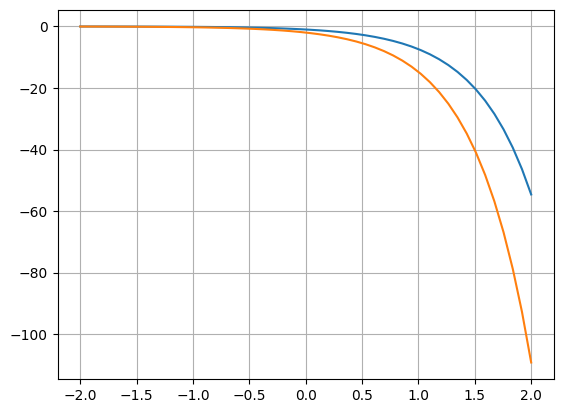

In [1]:
from numpy import sqrt, linspace, e
from matplotlib import pyplot as plt

def f(x):
    return -e**(2*x)

def numerisk(f, x, delta_x):
    return (f(x + delta_x) - f(x))/delta_x

def analytisk(x):
    return -2*e**(2*x)

def funksjon_graf(x_start, x_stopp):
    x = linspace(x_start, x_stopp)
    plt.grid()
    plt.plot(x, f(x))
    plt.plot(x, analytisk(x))   
    plt.show()

xstart, xslutt = -2, 2
x = xstart

xsteg = 1
delta_x = 0.0000001

while x <= xslutt:
    y1 = numerisk(f, x, delta_x)
    y2 = analytisk(x)
    differanse = abs(y1-y2)
    
    print(f"x     = {x}")
    print(f"f(x)  = {f(x)}")
    print(f"f'(x) = {y1:.3f}")
    print(f"f'(x) = {y2:.3f}")
    print(f"diff  = {differanse:.3f}\n")
    x += xsteg

funksjon_graf(xstart, xslutt)